## Sentiment Analysis Using Huggingface Pretrained Models


In [1]:
#import libraries
import collections
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import seaborn as sns
import os
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [2]:
#load dataset
train_df=pd.read_csv('dataset\Train.csv')

In [3]:
#chek the head
train_df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [4]:
#view info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


tweet_id is an object, the tweet is an object as expected while label and agreements are floats

In [5]:
#look at some of the tweets and how they are written
for tweet in range(5):
    tweet_str=train_df['safe_text'][tweet]
    print(f'{tweet_str}\n')

Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>

I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day

#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD

I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that

Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>



## Findings
Some tweets contain hashtags, others contain numbers while others contain plain text

usernames has been replaced with < user > while links has been replaced with < url >

## Exploratory Data analysis

1.use wordcloud to look at the most words appearing
2.check for emojis
3.most used words

Visualize frequent words using wordcloud

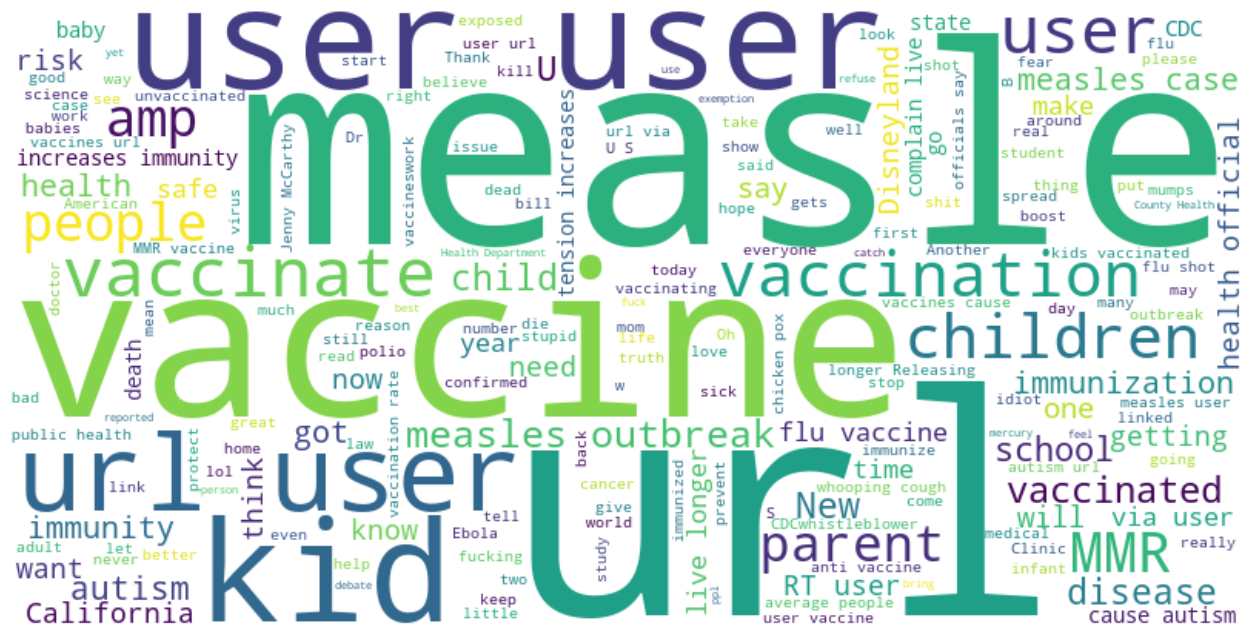

In [6]:

# Generate a word cloud from the message text data
text = " ".join(tweet for tweet in train_df.safe_text)
wordcloud = WordCloud(width=800, height=400, max_font_size=200, background_color="white").generate_from_text(text)

# Display the word cloud image
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

User and Url won't be relevant to our analysis so lets remove them

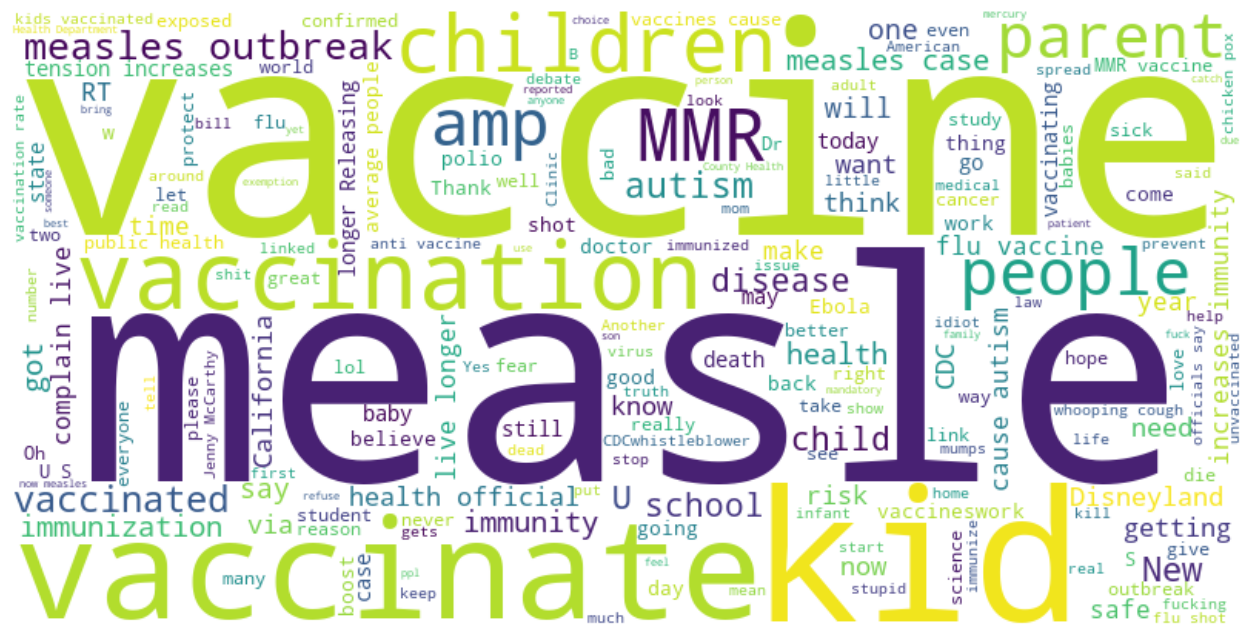

In [7]:
#replace user,url in the df
train_df['safe_text']=train_df['safe_text'].replace({'user':'','url':''},regex=True)


# regenerate wordcloud
text = " ".join(tweet for tweet in train_df.safe_text)
wordcloud = WordCloud(width=800, height=400, max_font_size=200, background_color="white").generate_from_text(text)

# Display the word cloud image
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Looks like the the vaccination is for measles and parents might be worried about their kids
this is why shoould understand the sentiment in each tweet 
to understand how parents feel about this vaccination

## Let's check word Frequency again using barcharts


In [8]:

#combine all tweets
tweets = " ".join(train_df['safe_text'].astype(str))


# Split the string into a list of words ignoring special characters 
words = re.findall(r'\b\w+\b', tweets)

# Count the occurrences of each word using Counter
word_counts = collections.Counter(words)

# Get the top 10 most common words and their counts
top_words = dict(word_counts.most_common(10))

top_words


{'to': 3502,
 'the': 3452,
 'measles': 2567,
 'of': 2242,
 'a': 2185,
 'I': 2157,
 'in': 1961,
 'and': 1870,
 'is': 1515,
 'for': 1500}

Check for the presence of Emojis: Emojis are a fundamental part of tweeting today

In [9]:
 #Function to extract all emojis from a text
def extract_emojis(tweet):
    return ''.join(E for E in tweet if E in emoji.EMOJI_DATA)


# Extract all emojis from the message text data
emojis = extract_emojis(tweets)



As expected we do have some emojis in our text
we can decide to fine tune algorithms that can handle emojis

In [10]:

# Create a list of all the extracted emojis
emojis_list = list(emojis)

# Count the frequency of each emoji in the list
emoji_dict = dict(collections.Counter(emojis_list))

# Sort the dictionary in descending order of frequency
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

# Convert the dictionary to a pandas DataFrame
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

# Display the top 20 most frequently used emojis
print(emoji_df.head(10))


  emoji  count
0     😂    140
1     💉     63
2     😷     58
3     🔥     52
4     😭     40
5     😳     39
6     💥     30
7     😒     29
8     🙌     27
9     👏     25


Visualize the top 10 most use

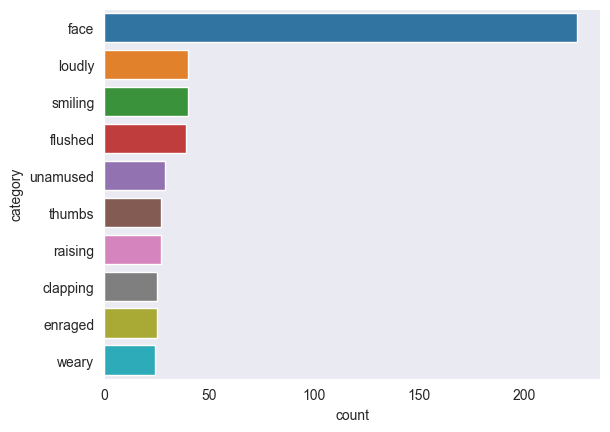

In [11]:
# Group the emojis by category
emoji_dict = collections.defaultdict(int)
for emoji_char in emojis_list:
    emoji_desc = emoji.demojize(emoji_char, delimiters=("", ""))
    emoji_desc_parts = emoji_desc.split("_")
    if len(emoji_desc_parts) > 1:
        emoji_category = emoji_desc_parts[0]
        emoji_dict[emoji_category] += 1

# Convert the dictionary to a pandas DataFrame
emoji_df = pd.DataFrame(emoji_dict.items(), columns=['category', 'count'])

# Sort the DataFrame by frequency count in descending order
emoji_df = emoji_df.sort_values(by='count', ascending=False)

# Select the top 10 rows
top_10_emojis = emoji_df.head(10)
sns.set_style('dark')
sns.barplot(x='count',y='category',data=emoji_df.head(10));